## Model Interpretation - Exploring the Bias Variance Trade-off

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? Y


### Objective:

Exploring the bias-variance trade-off.......

* **Part A: Overfitting in Linear Regression** .....

* **Part B: Overfitting in Decision Tree** .....

### A. Fitting a Linear Regression Line (Example)

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
train = pd.read_csv('wk3_kc_house_train_data.csv')
valid = pd.read_csv('wk3_kc_house_valid_data.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')


In [5]:
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


In [6]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
'''# Cleaning Date column
def column_clean(df):
    #df['date'] = df['date'].astype(str).str[0:4]
    #df['sqft_basement'] = np.where(df['sqft_basement'] > 0, 1, 0)
    #df['Area'] = train['sqft_living'] + train['sqft_lot']
    #df['House_age'] = 2020-train['yr_built']
    #df['zipcode'] = df['zipcode'].apply(str)
    return(df)'''

"# Cleaning Date column\ndef column_clean(df):\n    #df['date'] = df['date'].astype(str).str[0:4]\n    #df['sqft_basement'] = np.where(df['sqft_basement'] > 0, 1, 0)\n    #df['Area'] = train['sqft_living'] + train['sqft_lot']\n    #df['House_age'] = 2020-train['yr_built']\n    #df['zipcode'] = df['zipcode'].apply(str)\n    return(df)"

## Droping uwanted columns

In [8]:
# Date only have 201, 2015 year, can be dropped
def drop_col(df):
    df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
    return(df)

In [9]:
train = drop_col(train)
valid = drop_col(valid)
test = drop_col(test)

In [10]:
train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0
9757,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0
9758,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910
9759,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0


In [11]:
## Train Test Spilt
x_train = train.drop(['price'], axis=1)
y_train = train[['price']]

In [12]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
coeff_df = pd.DataFrame(np.transpose(LR.coef_), x_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-32322.786026
bathrooms,-12918.277831
sqft_living,139.637096
sqft_lot,-0.297293
floors,-5366.233514
waterfront,618145.495253
view,59646.540000
condition,53395.183737
grade,98929.602132
sqft_above,60.040454


In [14]:
#[REFER TO MY PREVIOUS NOTEBOOK]

### Here You Go ...

**A.1. Create a basic setup**

Write your own function called ‘polynomial_dataframe’ which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [15]:
def polynomial_dataframe(feature, degree):# feature is pandas.Series type
    import pandas
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pandas.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature**power
            
            
    return poly_dataframe

#### A.2. Fitting a Polynomial of degree 2

Use your polynomial_dataframe() function to create a dataframe with feature = 'sqft_living' and degree = 2. Take your y as 'price' and X as polynomial_dataframe(sales['sqft_living'], 1) and fit the regression model y on X. Plot the model on the scatter plot between 'sqft_living' and 'price'.

In [16]:
# Creating Training Data
Y_train = train[['price']]
X_train = polynomial_dataframe(train['sqft_living'], 2)

In [17]:
type(Y_train), Y_train.shape, type(X_train), X_train.shape

(pandas.core.frame.DataFrame,
 (9761, 1),
 pandas.core.frame.DataFrame,
 (9761, 2))

In [18]:
# Fitting Linear Regression
LR_deg2 = LinearRegression()
LR_deg2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
y_pred = LR_deg2.predict(X_train)

### Plotting Model

In [20]:
import matplotlib.pyplot as plt

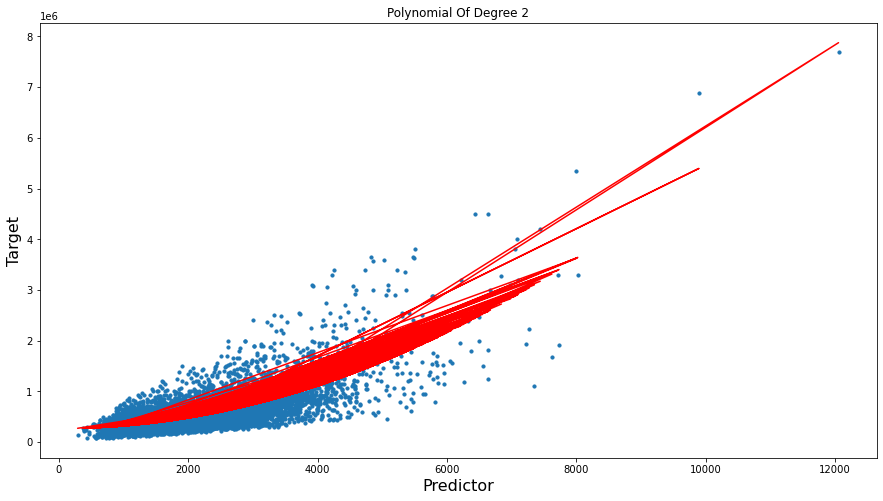

In [21]:
plt.figure(figsize=(15,8))
plt.scatter(X_train['power_1'],Y_train, s=10)
plt.plot(X_train['power_1'], y_pred, color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Polynomial Of Degree 2')
plt.show()

#### A.3. Fitting higher order polynomial fits

Fit a polynomial of 3rd degree, 4th degree and 5th degree. Look at the fitted line. Do they appear as you would expect?

### Polynomial Of 3rd Degree

In [22]:
# Creating Training Data
Y_train = train[['price']]
X_train = polynomial_dataframe(train['sqft_living'], 3)

In [23]:
type(Y_train), Y_train.shape, type(X_train), X_train.shape

(pandas.core.frame.DataFrame,
 (9761, 1),
 pandas.core.frame.DataFrame,
 (9761, 3))

In [24]:
# Fitting Linear Regression
LR_deg3 = LinearRegression()
LR_deg3.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
y_pred = LR_deg3.predict(X_train)

#### Plotting Model

In [26]:
import matplotlib.pyplot as plt

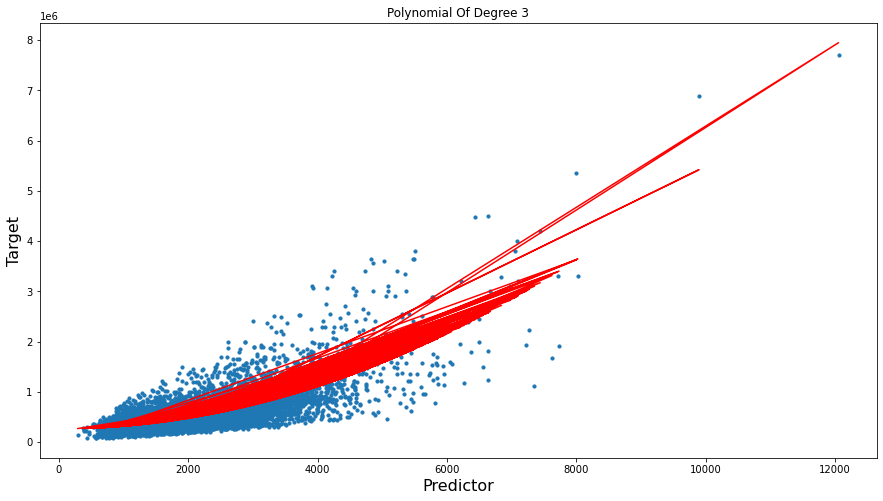

In [27]:
plt.figure(figsize=(15,8))
plt.scatter(X_train['power_1'],Y_train, s=10)
plt.plot(X_train['power_1'], y_pred, color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Polynomial Of Degree 3')
plt.show()

### Polynomial Of 4th Degree

In [28]:
# Creating Training Data
Y_train = train[['price']]
X_train = polynomial_dataframe(train['sqft_living'], 4)

In [29]:
type(Y_train), Y_train.shape, type(X_train), X_train.shape

(pandas.core.frame.DataFrame,
 (9761, 1),
 pandas.core.frame.DataFrame,
 (9761, 4))

In [30]:
# Fitting Linear Regression
LR_deg4 = LinearRegression()
LR_deg4.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
y_pred = LR_deg4.predict(X_train)

#### Plotting Model

In [32]:
import matplotlib.pyplot as plt

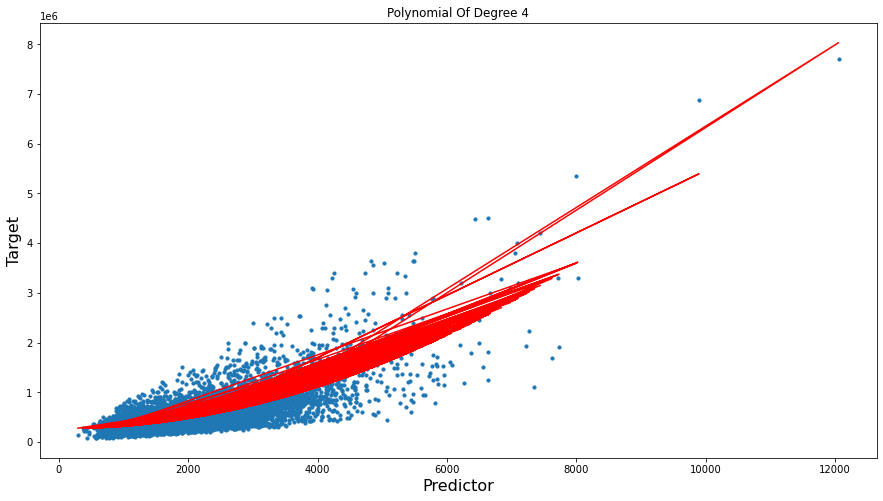

In [33]:
plt.figure(figsize=(15,8))
plt.scatter(X_train['power_1'],Y_train, s=10)
plt.plot(X_train['power_1'], y_pred, color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Polynomial Of Degree 4')
plt.show()

### Polynomial Of 5th Degree

In [34]:
# Creating Training Data
Y_train = train[['price']]
X_train = polynomial_dataframe(train['sqft_living'], 5)

In [35]:
type(Y_train), Y_train.shape, type(X_train), X_train.shape

(pandas.core.frame.DataFrame,
 (9761, 1),
 pandas.core.frame.DataFrame,
 (9761, 5))

In [36]:
# Fitting Linear Regression
LR_deg5 = LinearRegression()
LR_deg5.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
y_pred = LR_deg5.predict(X_train)

### Plotting Model

In [38]:
import matplotlib.pyplot as plt

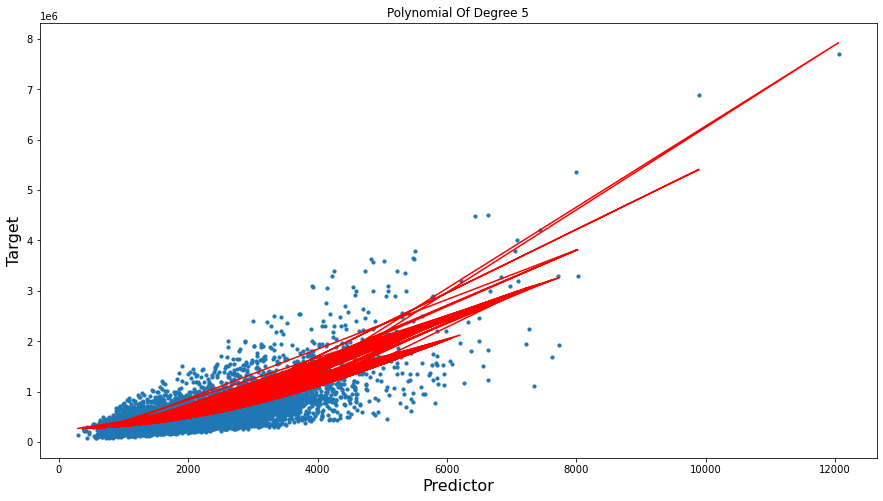

In [39]:
plt.figure(figsize=(15,8))
plt.scatter(X_train['power_1'],Y_train, s=10)
plt.plot(X_train['power_1'], y_pred, color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Polynomial Of Degree 5')
plt.show()

#### A.4. Fit a polynomial of degree 15

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

### Polynomial Of 15th Degree

In [40]:
# Creating Training Data
Y_train = train[['price']]
X_train = polynomial_dataframe(train['sqft_living'], 15)

In [41]:
type(Y_train), Y_train.shape, type(X_train), X_train.shape

(pandas.core.frame.DataFrame,
 (9761, 1),
 pandas.core.frame.DataFrame,
 (9761, 15))

In [42]:
# Fitting Linear Regression
LR_deg15 = LinearRegression()
LR_deg15.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
y_pred = LR_deg15.predict(X_train)

### Plotting Model

In [44]:
import matplotlib.pyplot as plt

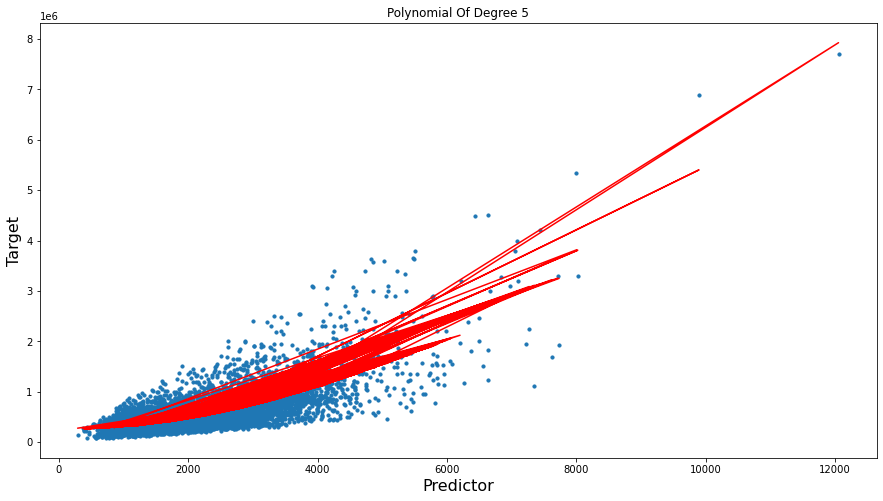

In [45]:
plt.figure(figsize=(15,8))
plt.scatter(X_train['power_1'],Y_train, s=10)
plt.plot(X_train['power_1'], y_pred, color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Polynomial Of Degree 5')
plt.show()

#### A.5. Exploring overfitting due to high variance

Estimate a 15th degree polynomial on all 4 subsets of the original sample (provided to you), plot the results and view the coefficients for all four models.

### Sample 1

In [46]:
samp1 = pd.read_csv('wk3_kc_house_set_1_data.csv')

In [47]:
# Creating Training Data
Y_train = samp1[['price']]
X_train = polynomial_dataframe(samp1['sqft_living'], 15)

In [48]:
type(Y_train), Y_train.shape, type(X_train), X_train.shape

(pandas.core.frame.DataFrame,
 (5404, 1),
 pandas.core.frame.DataFrame,
 (5404, 15))

In [49]:
# Fitting Linear Regression
LR_deg15_samp1 = LinearRegression()
LR_deg15_samp1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
y_pred1 = LR_deg15_samp1.predict(X_train)

In [51]:
LR_deg15_samp1.coef_, LR_deg15_samp1.intercept_

(array([[ 1.76184854e-05,  4.45061028e-02,  4.14400651e-06,
         -4.48321270e-10, -2.25930386e-14,  9.36750677e-17,
         -7.19910243e-16,  2.91433544e-16, -1.71737624e-16,
         -1.27502175e-15,  1.11889664e-16,  5.52726268e-16,
          1.95806912e-16, -3.17454396e-16, -3.81639165e-16]]),
 array([274689.58489854]))

### Plotting Model

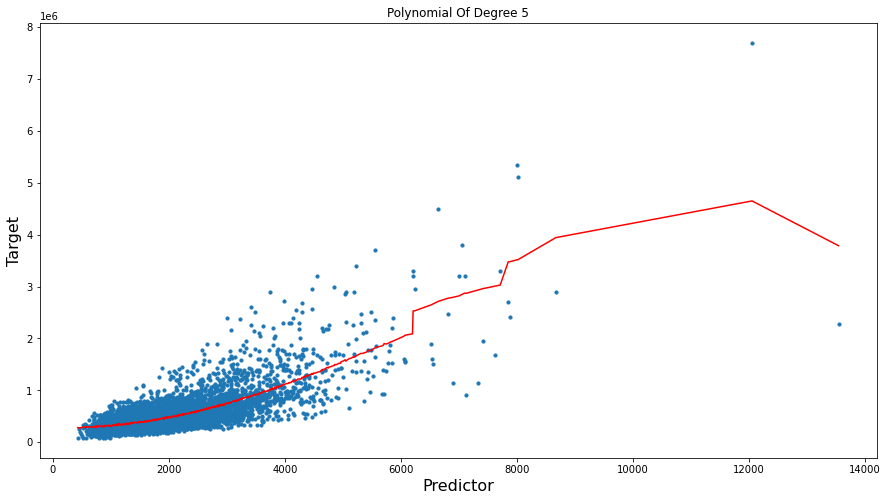

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(X_train['power_1'],Y_train, s=10)
plt.plot(X_train['power_1'], y_pred1, color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Polynomial Of Degree 5')
plt.show()

### Sample 2

In [53]:
samp2 = pd.read_csv('wk3_kc_house_set_2_data.csv')

In [54]:
# Creating Training Data
Y_train = samp2[['price']]
X_train = polynomial_dataframe(samp2['sqft_living'], 15)

In [55]:
type(Y_train), Y_train.shape, type(X_train), X_train.shape

(pandas.core.frame.DataFrame,
 (5398, 1),
 pandas.core.frame.DataFrame,
 (5398, 15))

In [56]:
# Fitting Linear Regression
LR_deg15_samp2 = LinearRegression()
LR_deg15_samp2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
y_pred2 = LR_deg15_samp2.predict(X_train)

In [58]:
LR_deg15_samp2.coef_, LR_deg15_samp2.intercept_

(array([[ 3.00562315e-05,  6.12914505e-02, -2.48080081e-06,
          1.09414880e-10, -1.77531601e-14,  7.97972799e-16,
         -3.70363462e-16, -3.01191364e-16, -6.03683770e-16,
          3.76434994e-16,  7.10369263e-16,  7.68482500e-16,
          1.04256881e-15, -4.66640615e-16,  1.34614542e-15]]),
 array([255884.56790631]))

### Plotting Model

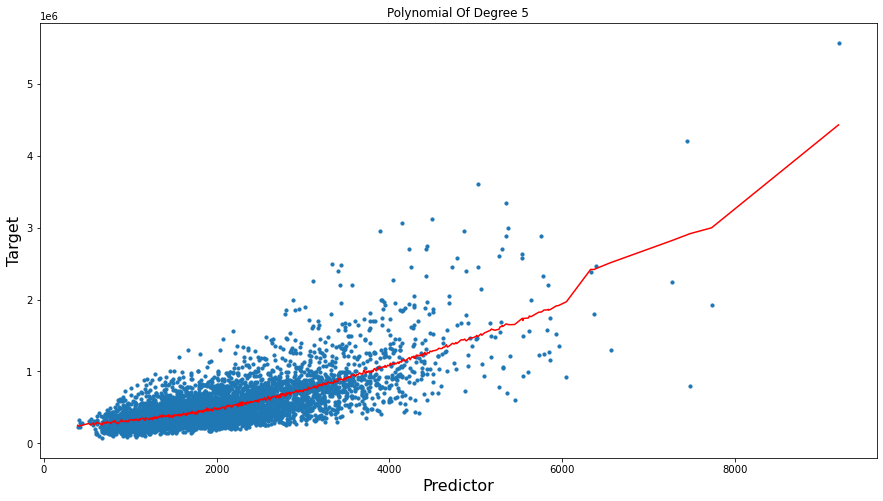

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(X_train['power_1'],Y_train, s=10)
plt.plot(X_train['power_1'], y_pred2, color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Polynomial Of Degree 5')
plt.show()

### Sample 3

In [60]:
samp3 = pd.read_csv('wk3_kc_house_set_3_data.csv')

In [61]:
# Creating Training Data
Y_train = samp3[['price']]
X_train = polynomial_dataframe(samp3['sqft_living'], 15)

In [62]:
type(Y_train), Y_train.shape, type(X_train), X_train.shape

(pandas.core.frame.DataFrame,
 (5409, 1),
 pandas.core.frame.DataFrame,
 (5409, 15))

In [63]:
# Fitting Linear Regression
LR_deg15_samp3 = LinearRegression()
LR_deg15_samp3.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
y_pred3 = LR_deg15_samp3.predict(X_train)

In [65]:
LR_deg15_samp3.coef_, LR_deg15_samp3.intercept_

(array([[ 3.05411518e-05,  6.76856677e-02, -5.33311481e-06,
          4.60102046e-10, -1.32151234e-14, -1.52655666e-16,
         -3.64725611e-16,  5.63785130e-16,  4.44089210e-16,
          5.41233725e-16, -2.23345648e-16,  1.13450915e-15,
          6.14092110e-16,  3.34801631e-16, -2.49800181e-16]]),
 array([251912.36364698]))

### Plotting Model

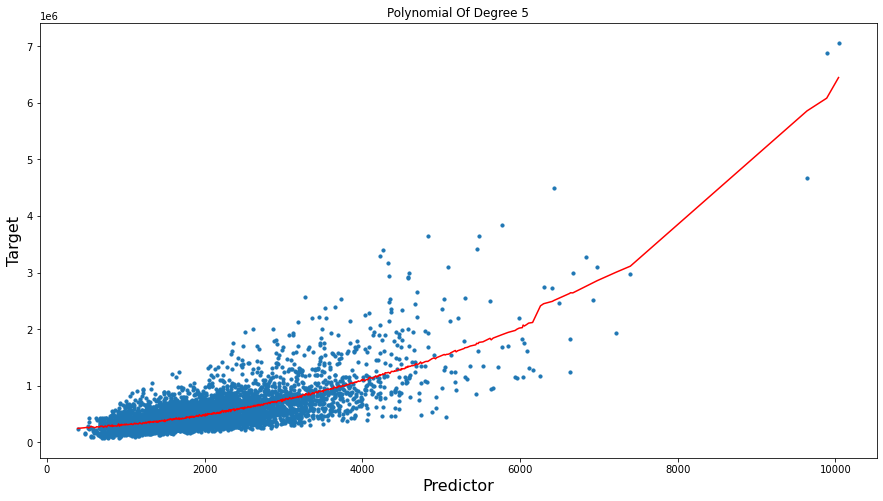

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(X_train['power_1'],Y_train, s=10)
plt.plot(X_train['power_1'], y_pred3, color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Polynomial Of Degree 5')
plt.show()

### Sample 4

In [67]:
samp4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [68]:
# Creating Training Data
Y_train = samp4[['price']]
X_train = polynomial_dataframe(samp4['sqft_living'], 15)

In [69]:
type(Y_train), Y_train.shape, type(X_train), X_train.shape

(pandas.core.frame.DataFrame,
 (5402, 1),
 pandas.core.frame.DataFrame,
 (5402, 15))

In [70]:
# Fitting Linear Regression
LR_deg15_samp4 = LinearRegression()
LR_deg15_samp4.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
y_pred4 = LR_deg15_samp4.predict(X_train)

In [72]:
LR_deg15_samp4.coef_, LR_deg15_samp4.intercept_

(array([[ 2.91884329e-05,  5.46724867e-02, -1.39708390e-06,
          6.93849733e-11,  3.46250806e-14, -1.22818422e-15,
         -4.00721123e-16,  9.03790931e-16, -4.90926744e-16,
         -5.45570533e-16,  2.77555756e-16,  3.98119038e-16,
          2.82759927e-16, -1.03562992e-15, -3.19189120e-16]]),
 array([269828.60918242]))

### Plotting Model

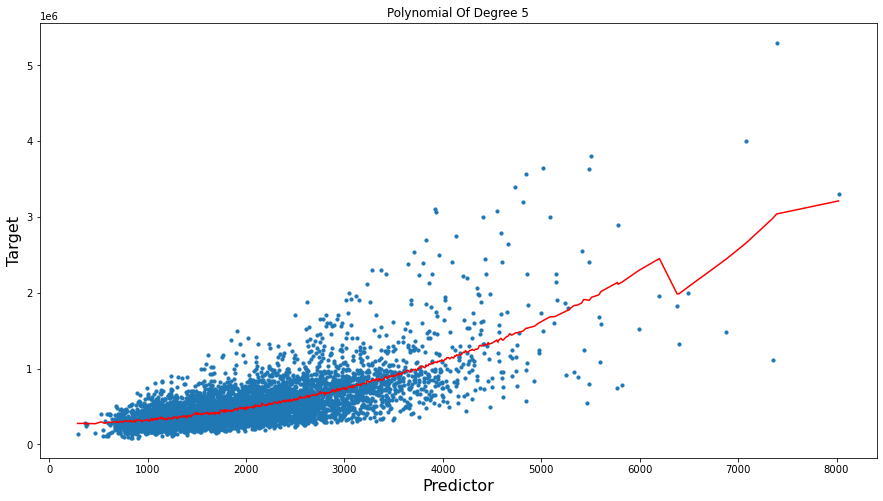

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(X_train['power_1'],Y_train, s=10)
plt.plot(X_train['power_1'], y_pred4, color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Polynomial Of Degree 5')
plt.show()

# **Answer the following questions**

**Is the sign (positive or negative) for power_15 the same in all four models?**

In [74]:
sample_coef = pd.DataFrame(np.transpose(LR_deg15_samp1.coef_), columns=['sample1'])

In [75]:
sample_coef['sample2'] = np.transpose(LR_deg15_samp2.coef_)
sample_coef['sample3'] = np.transpose(LR_deg15_samp3.coef_)
sample_coef['sample4'] = np.transpose(LR_deg15_samp4.coef_)


In [76]:
sample_coef

,sample1,sample2,sample3,sample4
0,1.761849e-05,3.005623e-05,3.054115e-05,2.918843e-05
1,4.450610e-02,6.129145e-02,6.768567e-02,5.467249e-02
2,4.144007e-06,-2.480801e-06,-5.333115e-06,-1.397084e-06
3,-4.483213e-10,1.094149e-10,4.601020e-10,6.938497e-11
4,-2.259304e-14,-1.775316e-14,-1.321512e-14,3.462508e-14
5,9.367507e-17,7.979728e-16,-1.526557e-16,-1.228184e-15
6,-7.199102e-16,-3.703635e-16,-3.647256e-16,-4.007211e-16
7,2.914335e-16,-3.011914e-16,5.637851e-16,9.037909e-16
8,-1.717376e-16,-6.036838e-16,4.440892e-16,-4.909267e-16
9,-1.275022e-15,3.764350e-16,5.412337e-16,-5.455705e-16


No, coefficient Sign are changing across Samples 1,2,3,4 as observed in above dataframe

**True/False the plotted fitted lines look the same in all four plots**

ANSWER: No, Plotted fitted lines are not same in all four Sample

#### A.6. Validate your models

A separate training set, validation set and test set is provided to you. For each degree (1,2,...15), fit a regression model on the training set and validate on the validation set by computing the RSS. Save the RSS in a list and plot a graph to visualize 'RSS' against 'Model Complexity'. 

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
RSS = []
for i in range(1,20):
    #print(i)
    # Creating Training Data
    Y_train = train[['price']]
    X_train = polynomial_dataframe(train['sqft_living'], i)
    Y_val = valid[['price']]
    X_val = polynomial_dataframe(valid['sqft_living'], i) 
    # Fitting Linear Regression
    Lin_reg = LinearRegression()
    Lin_reg.fit(X_train, Y_train)
    y_pred = Lin_reg.predict(X_val)
    Res_sum_sq = (((y_pred - Y_val).to_numpy())**2).sum()
    RSS.append(Res_sum_sq)

In [79]:
deg = np.arange(1, 20)
deg = deg.tolist()

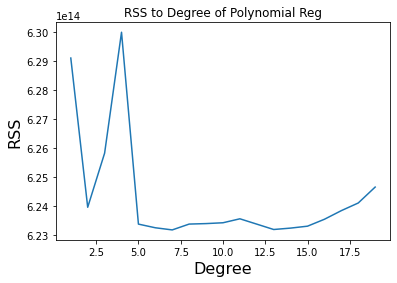

In [80]:
# plotting the RSS vs Degree plot

plt.plot(deg, RSS)
plt.xlabel('Degree',fontsize=16)
plt.ylabel('RSS',fontsize=16)
plt.title('RSS to Degree of Polynomial Reg')
plt.show()

**Answer the following questions**

**Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

As per the observation degree 7 having lowest RSS on validation data

#### A.7. Test your Final Model

Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

In [81]:
# Testing model on test data with polynomial degree 7
Y_train = train[['price']]
X_train = polynomial_dataframe(train['sqft_living'], 7)
Y_test = test[['price']]
X_test = polynomial_dataframe(test['sqft_living'], 7) 
# Fitting Linear Regression
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, Y_train)
y_pred = Lin_reg.predict(X_test)
Res_sum_sq = (((y_pred - Y_test).to_numpy())**2).sum()
print('RSS for Test Data is: ', Res_sum_sq)

RSS for Test Data is:  136760816910132.11


**what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)**

RSS for Test Data is:  136758855060200.06 or the model with the degree 7.

## B. Fitting a Regression Tree (Example)

In [82]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [83]:
train = pd.read_csv('wk3_kc_house_train_data.csv')
valid = pd.read_csv('wk3_kc_house_valid_data.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')


In [84]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


#### B.1. Fit a Decision Tree with 1 node

Consider the variables ["bedroom", "bathroom", "sqft_living", "floors", "grade"] as predictors and fit a decision tree model to predict the 'price'. Note that this is a model with low bias and high variance

In [85]:
X_train = train[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
Y_train = train[['price']]

In [86]:
X_val = valid[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
Y_val = valid[['price']]

In [87]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((9761, 5), (9761, 1), (9635, 5), (9635, 1))

In [88]:
clf_gini = DecisionTreeRegressor(random_state=100, min_samples_leaf= 1)

clf_gini.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [89]:
y_pred = clf_gini.predict(X_val)
y_pred = y_pred.reshape(9635,1)

In [90]:
y_pred.shape

(9635, 1)

In [91]:
RSS = (((y_pred - Y_val).to_numpy())**2).sum()
RSS

916866608868699.1

#### RSS is 9.1x10^14

#### B.2. Fitting deeper Trees

Consider the same variables and fit deeper and deeper decision trees on the training set and validate each trees on the validation set by coputing the RSS. Plot a graph to visualize the RSS against the Model Complexity

In [92]:
residuals_val = []
for i in range(1, 15):
    X_train = train[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
    Y_train = train[['price']]
    X_val = valid[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
    Y_val = valid[['price']]
    
    clf_gini = DecisionTreeRegressor(random_state=100, min_samples_leaf= 1, max_depth= i)
    clf_gini.fit(X_train, Y_train)
    
    y_pred = clf_gini.predict(X_val)
    y_pred = y_pred.reshape(9635,1)
    
    RSS = (((y_pred - Y_val).to_numpy())**2).sum()
    residuals_val.append(RSS)
    

In [93]:
len(residuals_val)

14

In [94]:
depth = np.arange(1,15)
depth = depth.tolist()
len(depth)

14

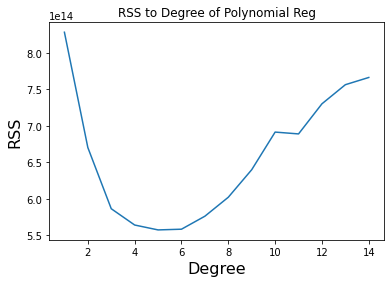

In [95]:
# plotting the RSS vs Degree plot
import matplotlib.pyplot as plt
plt.plot(depth, residuals_val)
plt.xlabel('Degree',fontsize=16)
plt.ylabel('RSS',fontsize=16)
plt.title('RSS to Degree of Polynomial Reg')
plt.show()

#### Minimum RSS is 5.5x10^14

#### B.3. Training Error Vs Validation Error

For each of the trees fitted above calculate the training accuracy. Plot RSS(train) and RSS(validation) against model Complexity on the same graph to compare the two.

In [96]:
residuals_train = []
for i in range(1, 15):
    X_train = train[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
    Y_train = train[['price']]
    clf_gini = DecisionTreeRegressor(random_state=100, min_samples_leaf= 1, max_depth= i)
    clf_gini.fit(X_train, Y_train)
    y_pred = clf_gini.predict(X_train)
    y_pred = y_pred.reshape(9761,1)
    
    RSS = (((y_pred - Y_train).to_numpy())**2).sum()
    residuals_train.append(RSS)
    

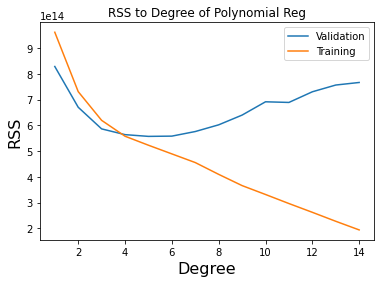

In [97]:
# plotting the RSS vs Degree plot
import matplotlib.pyplot as plt
plt.plot(depth, residuals_val)
plt.plot(depth, residuals_train)
plt.legend(('Validation', 'Training'))
plt.xlabel('Degree',fontsize=16)
plt.ylabel('RSS',fontsize=16)
plt.title('RSS to Degree of Polynomial Reg')
plt.show()

with increase in depth/complexity of tree Training RSS is decreasing continously, where as for validation RSS first it decrease after it starts increasing as model become more complex

#### B.4. Further Experiments

For a fixed depth, include more and more variables and repeat step B.2. What would you expect to happen. Perform the experiment and validate your hypotheses.

In [98]:
residuals_val = []
for i in range(1, 20):
    X_train = train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                     'view', 'condition', 'grade', 'sqft_above', 'sqft_basement','lat', 'long' ]]
    Y_train = train[['price']]
    X_val = valid[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                     'view', 'condition', 'grade', 'sqft_above', 'sqft_basement','lat', 'long' ]]
    Y_val = valid[['price']]
    
    clf_gini = DecisionTreeRegressor(random_state=100, min_samples_leaf= 1, max_depth= i)
    clf_gini.fit(X_train, Y_train)
    
    y_pred = clf_gini.predict(X_val)
    y_pred = y_pred.reshape(9635,1)
    
    RSS = (((y_pred - Y_val).to_numpy())**2).sum()
    residuals_val.append(RSS)

In [99]:
depth = np.arange(1,20)
depth = depth.tolist()
len(depth)

19

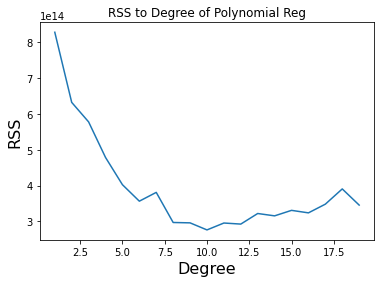

In [100]:
# plotting the RSS vs Degree plot
import matplotlib.pyplot as plt
plt.plot(depth, residuals_val)
plt.xlabel('Degree',fontsize=16)
plt.ylabel('RSS',fontsize=16)
plt.title('RSS to Degree of Polynomial Reg')
plt.show()

#### Minimum RSS observed is 2.7x10^14

## Finding

With increase in no of features the RSS validation is decreasing